# Import Statements

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Load Dataset

In [3]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv") 


In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
100*data['Churn'].value_counts()/len(data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

dataset is imbalanced

In [9]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Cleaning

In [10]:
df = data.copy()

In [11]:
df = df.drop(['customerID'], axis=1) 

In [12]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
# convert object to numeric values, if error it will convert it to NaN value

In [13]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

handelling the missing value

In [14]:
df.dropna(subset=['TotalCharges'], inplace=True)
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [15]:
print(df['tenure'].max())

72


highest value of tenure is 72, its better to divide it in ranges, 
so making a new column, range is 12 months, like 1-12 months, 13-24 months

In [16]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [17]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

Now we have tenure grp column, we can
drop the old tenure column,

In [18]:
df = df.drop(['tenure'], axis=1) 

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [20]:
df["Churn"] = [1 if i=="Yes" else 0 for i in df["Churn"]]


In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


# Plots

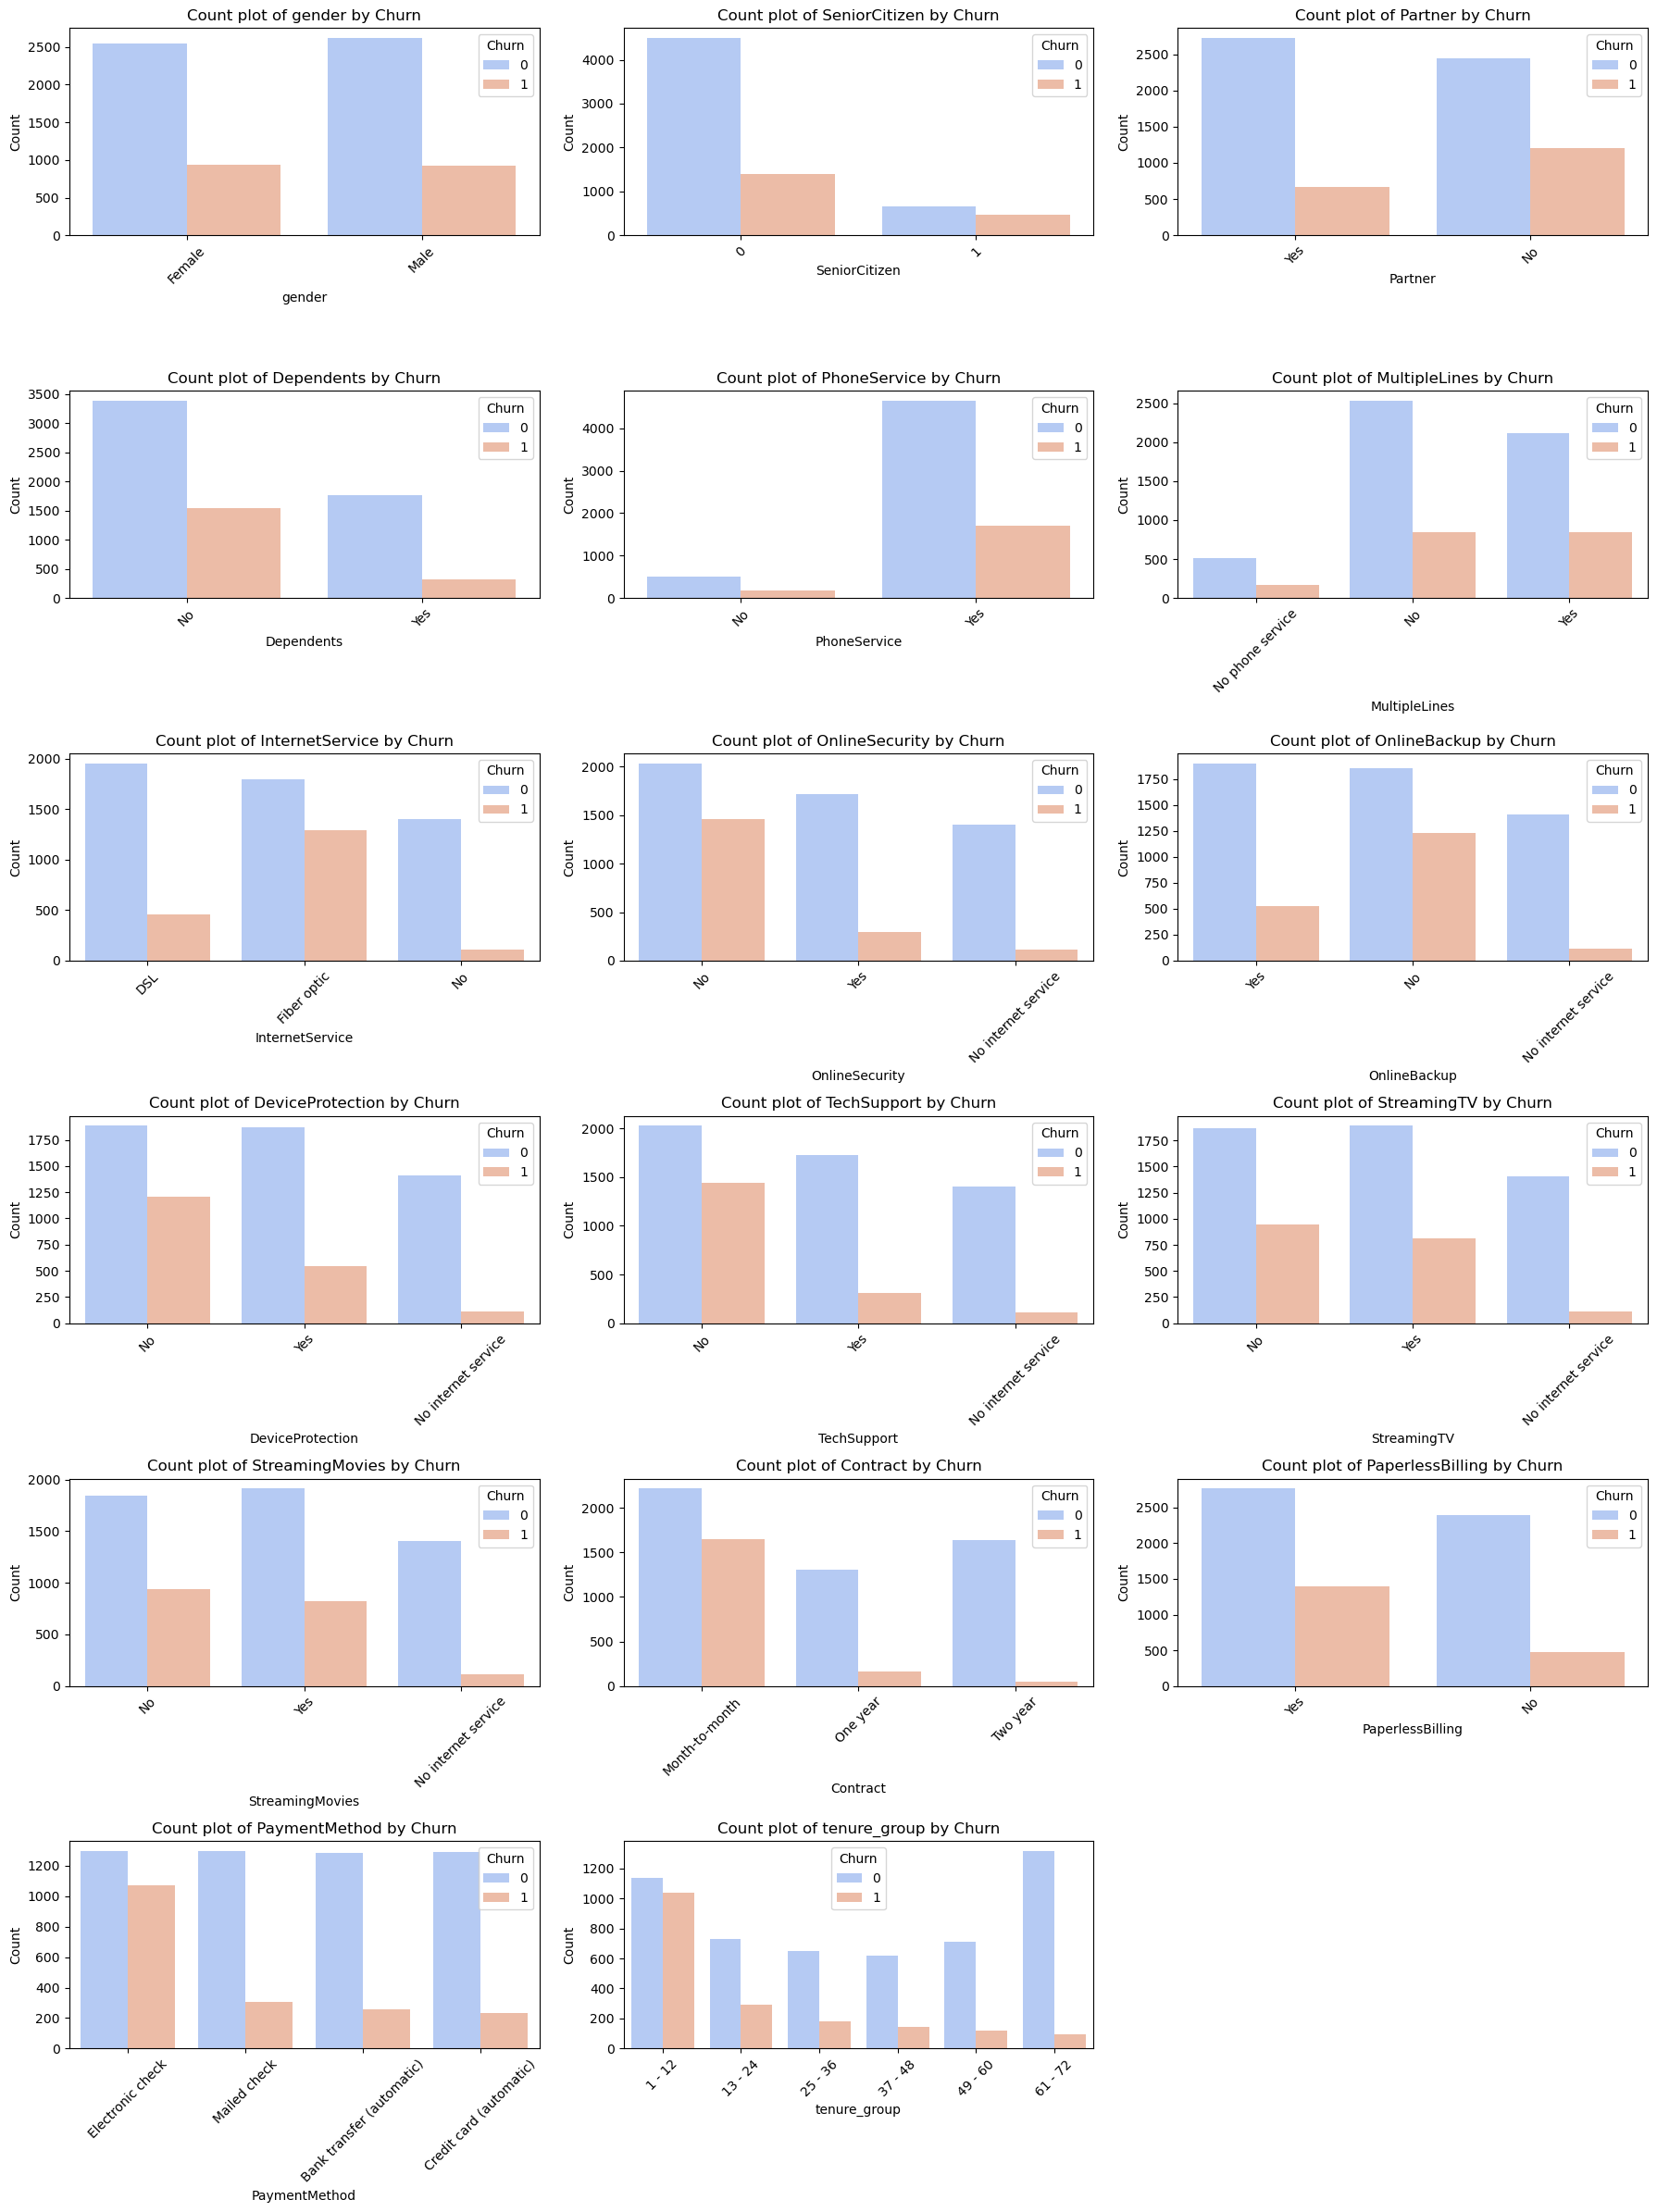

In [22]:
# Define the list of predictors excluding 'Churn', 'TotalCharges', and 'MonthlyCharges'
predictors = df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']).columns

# Set up the matplotlib figure with a grid of subplots
num_predictors = len(predictors)
num_cols = 3  # Number of columns in the grid
num_rows = (num_predictors + num_cols - 1) // num_cols  # Compute the number of rows needed

plt.figure(figsize=(18, num_rows * 4))

# Create subplots for each predictor
for i, predictor in enumerate(predictors):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=df, x=predictor, hue='Churn', palette='coolwarm')
    plt.title(f'Count plot of {predictor} by Churn')
    plt.xlabel(predictor)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


c:\Users\bhusa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

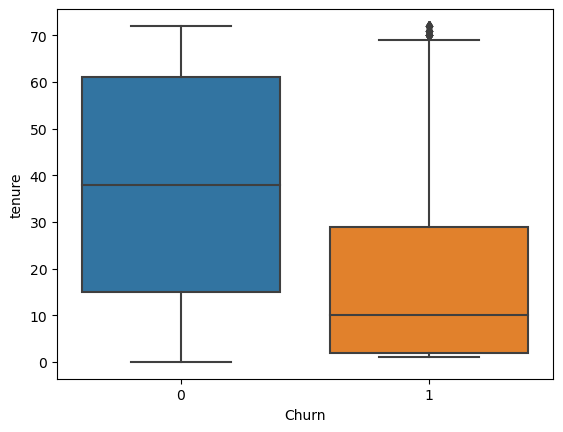

In [59]:
#plotting box plot 
x1=data['Churn']
y1=data['tenure']
sns.boxplot(x1,y1)

c:\Users\bhusa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

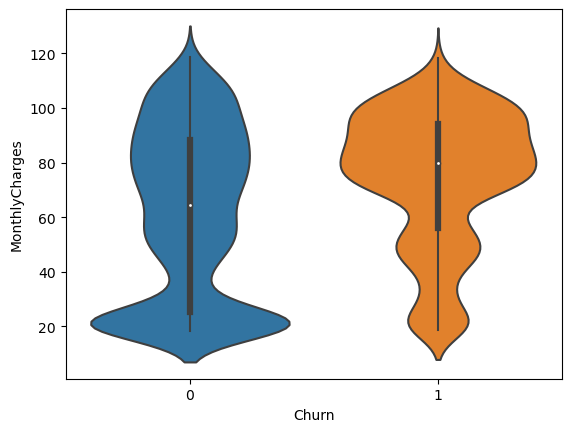

In [60]:
z=data['MonthlyCharges']
sns.violinplot(x1,z)

Text(0.5, 1.0, 'Customers who have churned vs Customers who havent')

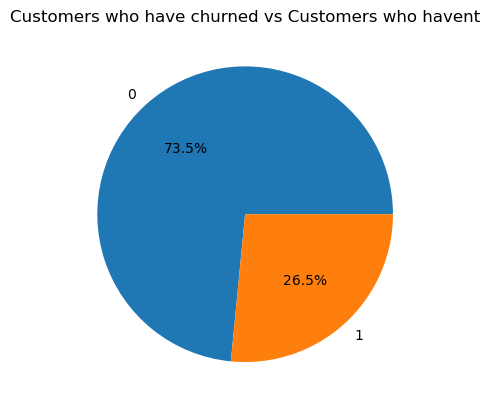

In [57]:
# piechart to dispay the customers who churned
churn1=data['Churn'].value_counts()
plt.pie(churn1,autopct="%1.1f%%",labels=churn1.index)
plt.title("Customers who have churned vs Customers who havent")

# One Hot Encoding/ Label Encoder for Categorical Variables

In [23]:
from sklearn.preprocessing import LabelEncoder 
for column in data:
    if data[column].dtype == np.number:
        continue
    data[column] = LabelEncoder().fit_transform(data[column])
data

C:\Users\bhusa\AppData\Local\Temp\ipykernel_12904\3996138564.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


In [24]:
df_dummies = pd.get_dummies(df)


In [25]:
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


# Correlation

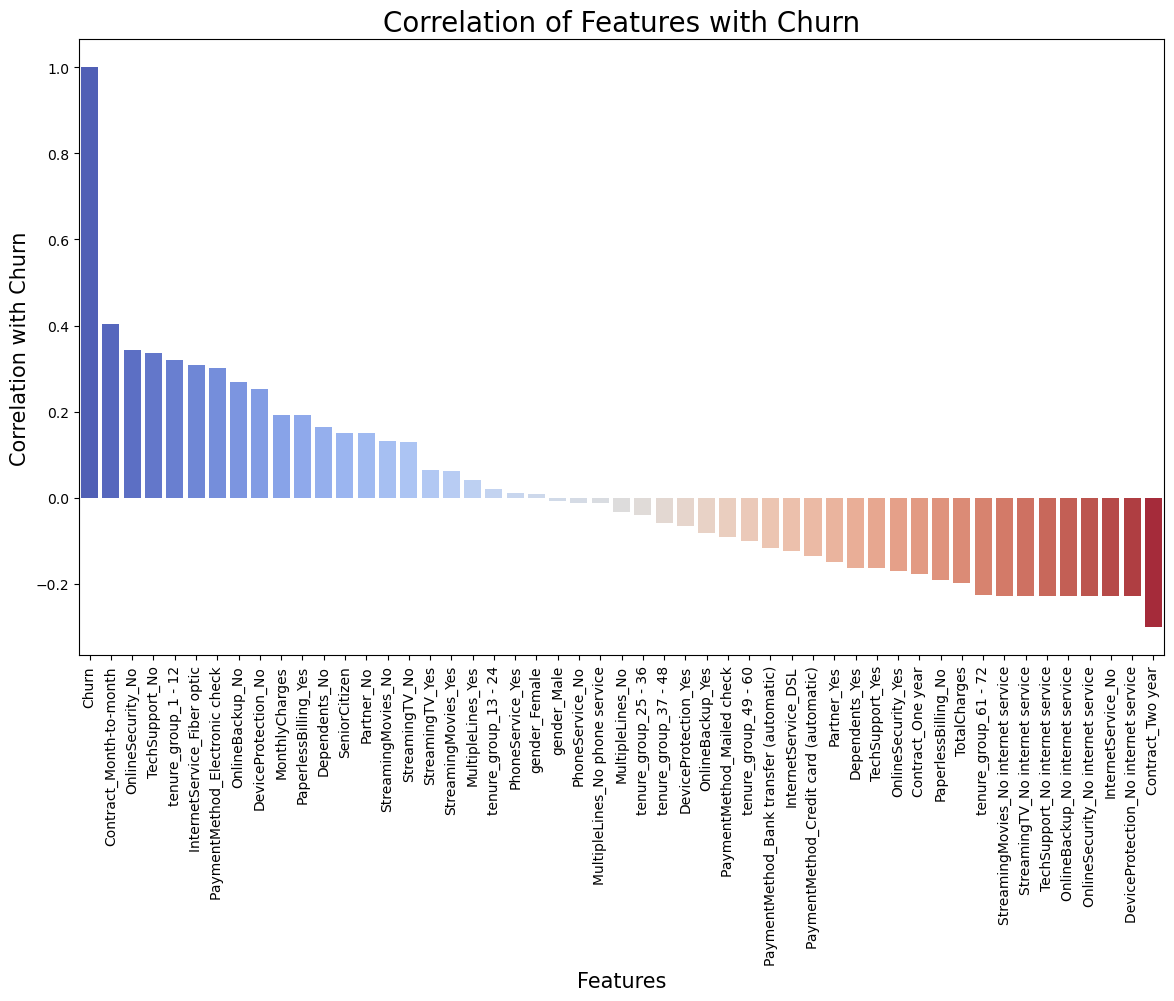

In [26]:
corr_with_churn = df_dummies.corr()['Churn'].sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x=corr_with_churn.index, y=corr_with_churn.values, palette='coolwarm')
plt.title('Correlation of Features with Churn', fontsize=20)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation with Churn', fontsize=15)
plt.xticks(rotation=90)

plt.show()


# Some Insights

* People leaving more when they have month-to-month contracts.
* If there's no online security or tech support, customers are more likely to leave.
* People tend to stay longer when they have long-term contracts.
* If the subscription doesn't include internet, there's less chance of people leaving.
* New subscribers in their first year tend to stop using the service.
* Customers with fiber optics internet are more likely to leave.

In [27]:
df_dummies.to_csv('tel_churn_encoded.csv')

In [28]:
new_df = df_dummies.copy()

# Train Test Split

In [29]:
new_df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [30]:
x=new_df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [31]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [32]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state = 4)

# Trying Logistic Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state=42,max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [35]:
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.7952

Confusion Matrix:
[[1154  109]
 [ 251  244]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1263
           1       0.69      0.49      0.58       495

    accuracy                           0.80      1758
   macro avg       0.76      0.70      0.72      1758
weighted avg       0.78      0.80      0.78      1758



In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest accuracy: {accuracy_rf}")


Random Forest accuracy: 0.7787258248009101


In [37]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [38]:
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.7952

Confusion Matrix:
[[1154  109]
 [ 251  244]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1263
           1       0.69      0.49      0.58       495

    accuracy                           0.80      1758
   macro avg       0.76      0.70      0.72      1758
weighted avg       0.78      0.80      0.78      1758



# Balancing dataset with Smote

In [39]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [40]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)


In [41]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.25)

In [42]:
model_sm = LogisticRegression(random_state=42,max_iter=1000)
model_sm.fit(xr_train, yr_train)
y_pred_sm = model_sm.predict(xr_test)

In [43]:
accuracy_lr = accuracy_score(yr_test, y_pred_sm)
conf_matrix_lr = confusion_matrix(yr_test, y_pred_sm)
classification_rep_lr = classification_report(yr_test, y_pred_sm)

# Improved Accuracy

In [44]:
print(f"Accuracy: {accuracy_lr:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_lr)
print("\nClassification Report:")
print(classification_rep_lr)

Accuracy: 0.9407

Confusion Matrix:
[[602  39]
 [ 48 779]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       641
           1       0.95      0.94      0.95       827

    accuracy                           0.94      1468
   macro avg       0.94      0.94      0.94      1468
weighted avg       0.94      0.94      0.94      1468



# Trying Other Models Together

In [45]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(xr_train, yr_train)
    yr_pred = model.predict(xr_test)
    accuracy = accuracy_score(yr_test, yr_pred)
    classification_rep = classification_report(yr_test, yr_pred)
    conf_matrix = confusion_matrix(yr_test, yr_pred)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_rep,
        'Confusion Matrix': conf_matrix
    }



In [46]:
results['Logistic Regression'] = {
    'Accuracy': accuracy_lr,
    'Classification Report': classification_rep_lr,
    'Confusion Matrix': conf_matrix_lr
}

In [47]:
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("\n" + "="*50 + "\n")

Model: SVM
Accuracy: 0.7391
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       641
           1       0.81      0.70      0.75       827

    accuracy                           0.74      1468
   macro avg       0.74      0.74      0.74      1468
weighted avg       0.75      0.74      0.74      1468

Confusion Matrix:
[[505 136]
 [247 580]]


Model: Random Forest
Accuracy: 0.9489
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       641
           1       0.96      0.95      0.95       827

    accuracy                           0.95      1468
   macro avg       0.95      0.95      0.95      1468
weighted avg       0.95      0.95      0.95      1468

Confusion Matrix:
[[605  36]
 [ 39 788]]


Model: Gradient Boosting
Accuracy: 0.9503
Classification Report:
              precision    recall  f1-score   support

           0       0.93     

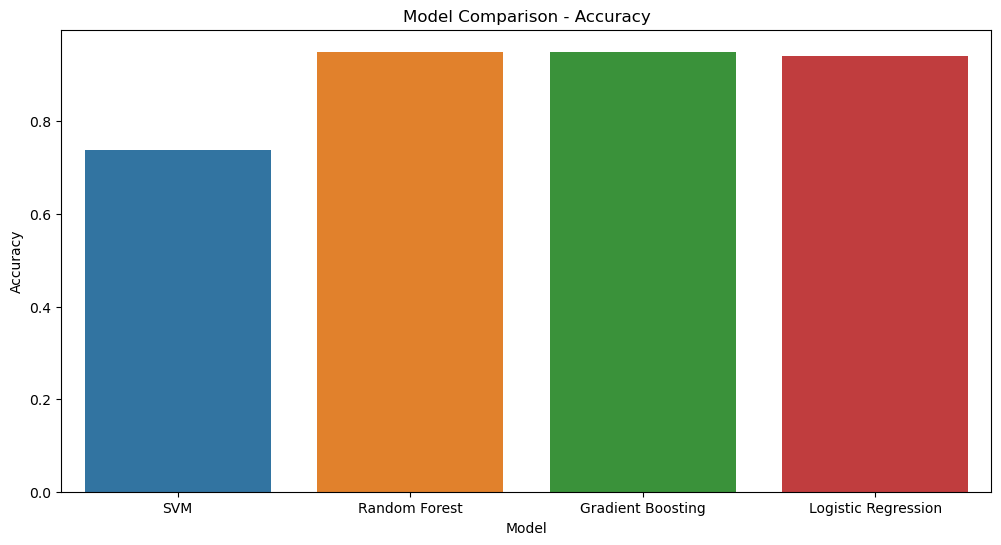

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(results.keys()), y=[result['Accuracy'] for result in results.values()])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Hyper parameter tuning

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_model = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, verbose=1)

grid_search.fit(xr_train, yr_train)



Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [50]:
best_model = grid_search.best_estimator_

In [51]:
y_pred_test = best_model.predict(xr_test)
accuracy_test = accuracy_score(yr_test, y_pred_test)

In [52]:
print("Accuracy: ", accuracy_test)
print("Confusion Matrix:\n", confusion_matrix(yr_test, y_pred_test))
print("\nClassification Report:\n", classification_report(yr_test, y_pred_test))

Accuracy:  0.9509536784741145
Confusion Matrix:
 [[616  25]
 [ 47 780]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       641
           1       0.97      0.94      0.96       827

    accuracy                           0.95      1468
   macro avg       0.95      0.95      0.95      1468
weighted avg       0.95      0.95      0.95      1468



In [53]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, verbose=1)
grid_search_rf.fit(xr_train, yr_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [54]:
best_model_r = grid_search.best_estimator_

In [55]:
y_pred_test_r = best_model_r.predict(xr_test)
accuracy_test_r = accuracy_score(yr_test, y_pred_test_r)

In [56]:
print("Accuracy: ", accuracy_test)
print("Confusion Matrix:\n", confusion_matrix(yr_test, y_pred_test_r))
print("\nClassification Report:\n", classification_report(yr_test, y_pred_test_r))

Accuracy:  0.9509536784741145
Confusion Matrix:
 [[616  25]
 [ 47 780]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       641
           1       0.97      0.94      0.96       827

    accuracy                           0.95      1468
   macro avg       0.95      0.95      0.95      1468
weighted avg       0.95      0.95      0.95      1468

